## First Analysis of the data
This notebook is going to give a brief analysis of the initial data from ```https://financialmodelingprep.com```.  
Apple it is gooing to be analyzed, the current code if **AAPL**

In [2]:
import requests, json

In [3]:
# Retrieving the enterprise value information.
response = requests.get("https://financialmodelingprep.com/api/v3/enterprise-values/AAPL?limit=80&apikey=demo")
response_list = response.json()

In [4]:
import pandas as pd

In [5]:
# Turn the data retireved to a dataframe
data = pd.DataFrame(response_list)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   symbol                       36 non-null     object 
 1   date                         36 non-null     object 
 2   stockPrice                   36 non-null     float64
 3   numberOfShares               36 non-null     int64  
 4   marketCapitalization         36 non-null     float64
 5   minusCashAndCashEquivalents  36 non-null     int64  
 6   addTotalDebt                 36 non-null     int64  
 7   enterpriseValue              36 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ KB


In [7]:
data_num_variables = data[['stockPrice', 'numberOfShares', 'marketCapitalization',
                          'minusCashAndCashEquivalents', 'addTotalDebt','enterpriseValue']]
data_num_variables.head()

,stockPrice,numberOfShares,marketCapitalization,minusCashAndCashEquivalents,addTotalDebt,enterpriseValue
0,115.050003,17352119000,1.996361e+12,38016000000,112436000000,2.070781e+12
1,62.262501,18471336000,1.150072e+12,48844000000,108047000000,1.209275e+12
2,53.060001,19821508000,1.051729e+12,25913000000,114483000000,1.140299e+12
3,41.680000,20868968000,8.698186e+11,20289000000,115680000000,9.652096e+11
4,29.412500,21883280000,6.436420e+11,20484000000,83532000000,7.066900e+11


In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Creating an array with the numerical variables and a vector of ones.
num_variables = np.array(data_num_variables)
num_variables.shape
ones = np.ones(( num_variables.shape[0] ,1), dtype=int)
ones.shape

(36, 1)

In [10]:
# Multiplication of matrixes
averages = np.dot(num_variables.transpose((1,0)),ones)/num_variables.shape[0]
averages.shape

(6, 1)

In [11]:
# Centering machine
centering = np.identity(num_variables.shape[0]) - (np.dot(ones, ones.transpose((1,0)))/num_variables.shape[0])

In [12]:
#covariance matrix
s = np.dot( np.dot(num_variables.transpose((1,0)),centering) ,num_variables)
s.shape

(6, 6)

In [13]:
import seaborn as sns

In [14]:
# Matrix of correlation of the data
data.corr()

,stockPrice,numberOfShares,marketCapitalization,minusCashAndCashEquivalents,addTotalDebt,enterpriseValue
stockPrice,1.000000,0.220959,0.991014,0.903625,0.876885,0.990411
numberOfShares,0.220959,1.000000,0.308539,0.374739,0.147204,0.295768
marketCapitalization,0.991014,0.308539,1.000000,0.918492,0.886400,0.999359
minusCashAndCashEquivalents,0.903625,0.374739,0.918492,1.000000,0.877907,0.919354
addTotalDebt,0.876885,0.147204,0.886400,0.877907,1.000000,0.901877
enterpriseValue,0.990411,0.295768,0.999359,0.919354,0.901877,1.000000


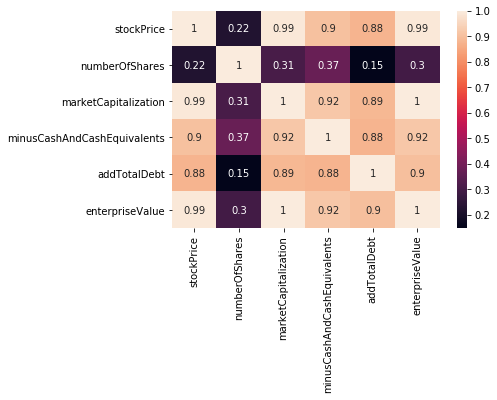

In [15]:
sns.heatmap(data.corr(), annot=True)

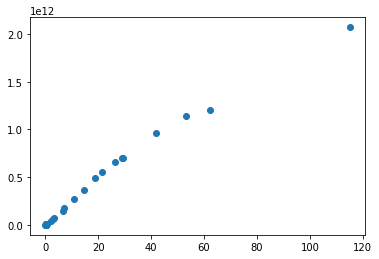

In [16]:
plt.scatter(data.stockPrice, data.enterpriseValue)

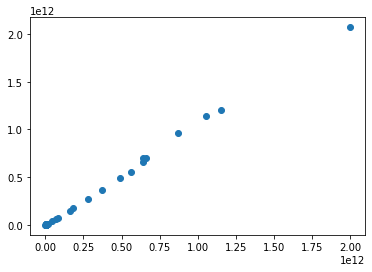

In [17]:
plt.scatter(data.marketCapitalization, data.enterpriseValue)

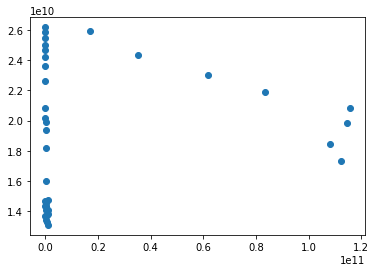

In [18]:
plt.scatter(data.addTotalDebt, data.numberOfShares)

For this set of data there is a clear correlation between the variables stockPrice and enterpriseValue.  


In [19]:
np.cov(data.stockPrice, data.enterpriseValue)

array([[5.61811023e+02, 1.09412835e+13],
       [1.09412835e+13, 2.17227707e+23]])

In [20]:
np.cov(data_num_variables)

array([[ 1.05977062e+24,  6.05073628e+23,  5.62974053e+23, ...,
         4.37419030e+20, -1.04618260e+21, -1.40707582e+21],
       [ 6.05073628e+23,  3.45723905e+23,  3.21758100e+23, ...,
         2.16051311e+20, -6.29374211e+20, -8.33632282e+20],
       [ 5.62974053e+23,  3.21758100e+23,  2.99682121e+23, ...,
         2.06678715e+20, -5.79576817e+20, -7.68215758e+20],
       ...,
       [ 4.37419030e+20,  2.16051311e+20,  2.06678715e+20, ...,
         3.18026155e+19,  3.04191991e+19,  2.89389089e+19],
       [-1.04618260e+21, -6.29374211e+20, -5.79576817e+20, ...,
         3.04191991e+19,  3.11345835e+19,  3.01944529e+19],
       [-1.40707582e+21, -8.33632282e+20, -7.68215758e+20, ...,
         2.89389089e+19,  3.01944529e+19,  2.94457050e+19]])

In [21]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [22]:
correlation = pearsonr(data.stockPrice, data.enterpriseValue)

In [23]:
print(correlation)

(0.9904111808575077, 8.10947179516356e-31)


In [24]:
print(spearmanr(data.stockPrice, data.enterpriseValue))

SpearmanrResult(correlation=0.9960743955242156, pvalue=2.1579242968397894e-37)


In [25]:
print(spearmanr(data.addTotalDebt, data.numberOfShares))

SpearmanrResult(correlation=-0.19247743164608022, pvalue=0.2607317891713996)
